# Psycholinguistic classifier

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline  

from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier, XGBRegressor

from ml_utils import print_roc, evaluate, best_threshold

from features import FeatureExtractor

from data import Data

In [2]:
psycholinguistics_path = 'utils/Psycholinguistic_Features.txt'
lm_books_path = '/Users/nathanhartmann/Desktop/cwi_utils/model_books.lm'
lm_news_path = '/Users/nathanhartmann/Desktop/cwi_utils/model_news.lm'
# lm_books_path = '/home/leabdro/Documentos/language_models/model_books.lm'
# lm_news_path = '//home/leabdro/Documentos/language_models/model_news.lm'
training_data = ['datasets/english/News_Train.tsv',
                 'datasets/english/WikiNews_Train.tsv',
                 'datasets/english/Wikipedia_Train.tsv',
                ]
dev_data = ['datasets/english/News_Dev.tsv',
            'datasets/english/WikiNews_Dev.tsv',
            'datasets/english/Wikipedia_Dev.tsv'
           ]
test_data = ['datasets/english/News_Test.tsv',
            'datasets/english/WikiNews_Test.tsv',
            'datasets/english/Wikipedia_Test.tsv'
           ]

-----
# Features extraction

In [3]:
data_train = Data(training_data)
data_dev = Data(dev_data)
data_test = Data(test_data, is_test=True)

In [4]:
fe = FeatureExtractor(psycho_path=psycholinguistics_path, lm_books_path=lm_books_path, lm_news_path=lm_news_path)

x_train = fe.predict_linguistics(data_train.instances)
y_train, y_train_prob = data_train.y, data_train.y_prob

x_dev = fe.predict_linguistics(data_dev.instances)
y_dev, y_dev_prob = data_dev.y, data_dev.y_prob

x_test = fe.predict_linguistics(data_test.instances)
y_test, y_test_prob = data_test.y, data_test.y_prob

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_dev_scaled = scaler.transform(x_dev)
x_test_scales = scaler.transform(x_test)

-----
# Predicting

## LogisticRegression

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.48
--Scores--
Accuracy: 0.68
Precision: 0.59
Recall: 0.62
F1: 0.61
--Confusion matrix:--
 [[1436  567]
 [ 504  821]]


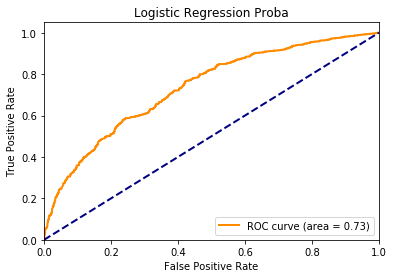

In [6]:
# model = LogisticRegression()
# param_grid = {
#   'C': [0.001,0.01,0.1,1,10,100,1000],
#  'penalty':['l1', 'l2']
# }
# grid_search_classifiers(model, param_grid)
model = LogisticRegression()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Logistic Regression Proba')

/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


--Optimizing f1--
Threshold: 0.48
--Scores--
Accuracy: 0.68
Precision: 0.57
Recall: 0.63
F1: 0.60
--Confusion matrix:--
 [[1487  601]
 [ 453  787]]


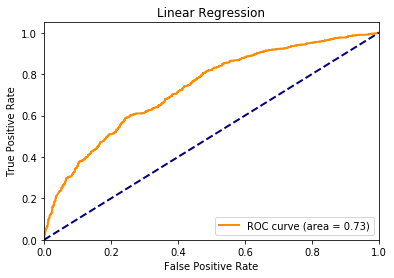

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Linear Regression')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.47
--Scores--
Accuracy: 0.81
Precision: 0.77
Recall: 0.77
F1: 0.77
--Confusion matrix:--
 [[1613  321]
 [ 327 1067]]


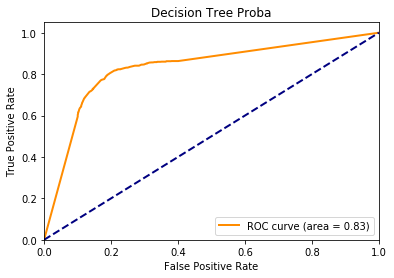

In [10]:
# tree = DecisionTreeClassifier(
#     min_samples_split=20,
#     max_depth=5,
#     min_samples_leaf=10,
#     criterion='gini')
# grid_search_regressors(tree, param_grid)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Decision Tree Proba')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.50
--Scores--
Accuracy: 0.74
Precision: 0.91
Recall: 0.63
F1: 0.75
--Confusion matrix:--
 [[1212  126]
 [ 728 1262]]


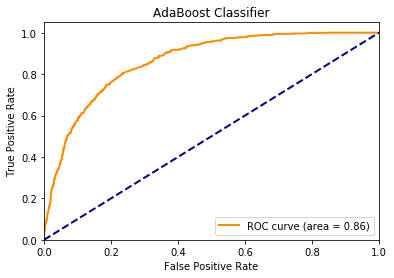

In [11]:
# ensemb = AdaBoostClassifier(
#     n_estimators=300,
#     learning_rate=0.001)
# grid_search_regressors(ensemb, param_grid)
model = AdaBoostClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='AdaBoost Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.50
--Scores--
Accuracy: 0.76
Precision: 0.76
Recall: 0.70
F1: 0.73
--Confusion matrix:--
 [[1487  334]
 [ 453 1054]]


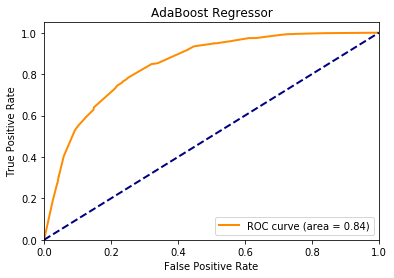

In [12]:
# model = AdaBoostRegressor()
# param_grid = {
#     'n_estimators':[10, 50, 100, 200, 300],
#     'learning_rate': [1, 0.1, 0.001, 0.0001],
#      'loss':['linear', 'square', 'exponential']}
# grid_search_regressors(model, param_grid)
model = AdaBoostRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='AdaBoost Regressor')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.51
--Scores--
Accuracy: 0.82
Precision: 0.78
Recall: 0.79
F1: 0.78
--Confusion matrix:--
 [[1651  309]
 [ 289 1079]]


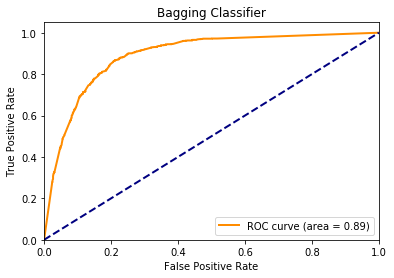

In [13]:
# model = BaggingClassifier()
# param_grid = {
#     'n_estimators':[10, 50, 100, 200, 300]}
# grid_search_regressors(model, param_grid)
model = BaggingClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Bagging Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.51
--Scores--
Accuracy: 0.82
Precision: 0.78
Recall: 0.78
F1: 0.78
--Confusion matrix:--
 [[1636  304]
 [ 304 1084]]


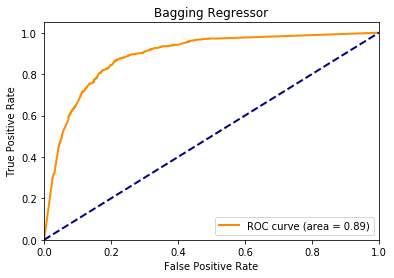

In [14]:
# model = BaggingRegressor()
# param_grid = {
#     'n_estimators':[10, 50, 100, 200, 300]}
# grid_search_regressors(model, param_grid)
model = BaggingRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Bagging Regressor')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.47
--Scores--
Accuracy: 0.83
Precision: 0.82
Recall: 0.78
F1: 0.80
--Confusion matrix:--
 [[1613  251]
 [ 327 1137]]


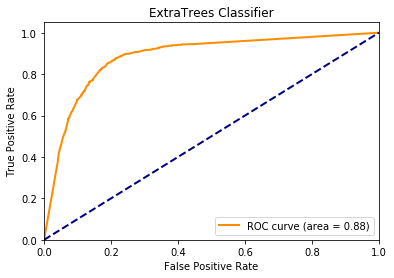

In [15]:
# model = tree = ExtraTreesClassifier()
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [2, 10, 20],
#     'max_depth': [None, 2, 5, 10],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features':[None, 'sqrt', 'log2'],
#     'max_leaf_nodes': [None, 5, 10, 20]
# }
# grid_search_classifiers(model, param_grid)
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='ExtraTrees Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.47
--Scores--
Accuracy: 0.83
Precision: 0.81
Recall: 0.78
F1: 0.80
--Confusion matrix:--
 [[1621  257]
 [ 319 1131]]


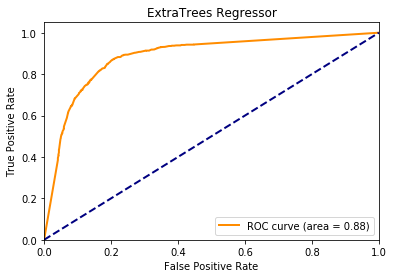

In [16]:
# model = ExtraTreesRegressor()
# param_grid = {
#     'criterion':['mse', 'mae'],
#     'min_samples_split': [2, 10, 20],
#     'max_depth': [None, 2, 5, 10],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features':[None, 'sqrt', 'log2'],
#     'max_leaf_nodes': [None, 5, 10, 20]}
# grid_search_regressors(model, param_grid)
model = ExtraTreesRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='ExtraTrees Regressor')

In [15]:
from sklearn.metrics import mean_absolute_error
print('mean_absolute_error(pred_train, y_train):', mean_absolute_error(pred_train, y_train))
print('mean_absolute_error(pred_train, y_train_prob):', mean_absolute_error(pred_train, y_train_prob))
print('mean_absolute_error(pred_dev, y_dev):', mean_absolute_error(pred_dev, y_dev))
print('mean_absolute_error(pred_dev, y_dev_prob):', mean_absolute_error(pred_dev, y_dev_prob))

mean_absolute_error(pred_train, y_train): 0.186249196041746
mean_absolute_error(pred_train, y_train_prob): 0.3274514992953054
mean_absolute_error(pred_dev, y_dev): 0.23981477883690927
mean_absolute_error(pred_dev, y_dev_prob): 0.33631788005543684


--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.53
--Scores--
Accuracy: 0.83
Precision: 0.80
Recall: 0.80
F1: 0.80
--Confusion matrix:--
 [[1656  273]
 [ 284 1115]]


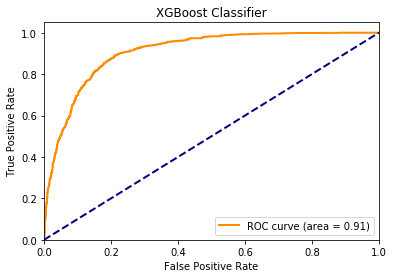

In [17]:
model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1)
model.fit(x_train_scaled, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='XGBoost Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.44
--Scores--
Accuracy: 0.79
Precision: 0.80
Recall: 0.73
F1: 0.76
--Confusion matrix:--
 [[1528  282]
 [ 412 1106]]


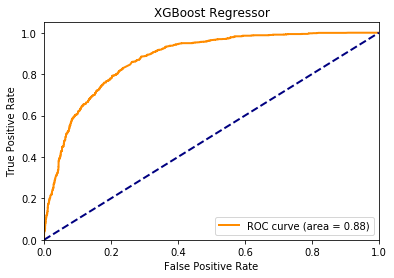

In [25]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='XGBoost Regressor')

-----
# Tests

* target words not in psycholinguistic_features

In [110]:
# count = 0
# errors = []
# for instance in data_train.instances:
#     for target in instance.target:
#         try:
#             if len(df[df.Word == instance.tokens[target]].index) == 0:
#                 count += 1
#                 errors.append(instance.tokens[target])
#         except:
#             print(target, instance.target_chars, instance.tokens)
# print('%d / %d' % (count, len(data_train.instances)))
# print(list(set(errors)))

4014 / 27299
['', 'kabul', 'crackdown', 'goldenbridge', 'targeted', 'mla', 'amygdala', 'brevard', 'blek', 'teammate', 'jarvis', 'radars', 'cooperation', 'cernan', 'thumbs-up', 'stanković', 'gardner', 'luhman', 'bos', 'islamist', 'refinance', 'lockdown', 'tawam', 'kong', 'atropos', 'primetime', 'lt', 'bbc', 'dibenzenechromium', 'dvd', 'césar', 'organometallic', 'pompeii', 'asia', 'samsung', 'six-hour', 'nestmates', 'oriente', 'nasser', 'al-burnhanieh', 'london-based', 'iczn', 'perkasie', 'caspicara', 'maakond', 'itunes', 'pushkin', 'schengen', 'scm', 'brp', 'ibm', 'obamacare', 'moesian', 'pupates', 'kcvo', 'signings', 'premiered', 'kremlin-dominated', 'confusingly', 'choe', 'murad', 'karam', 'ex-soviet', 'primeiro', 'disabled/handicapped', 'fernando', 'worldwide', 'noorughli', 'doskozil', 'bosnia', 'mimar', 'eyewitnesses', 'kcb', 'timeline', 'psni', 'keita', 'rosenkavalier', '“', 'utc', 'hudson', 'gliese', 'favorites', 'shalygina', 'jaeg', 'six-point', 'thespis', 'temer', 'magherafelt',

In [64]:
fe = FeatureExtractor(psycho_path=psycholinguistics_path, lm_books_path=lm_books_path, lm_news_path=lm_news_path)

In [60]:
import pandas as pd
words = [data_train.instances[1].tokens[i] for i in data_train.instances[1].target]
wordnets = []
for word in words:
    dic = {'synsets':0, 'hypernyms':0}
    syns = wn.synsets(word)
    dic['synsets'] = len(syns)
    for syn in syns:
        dic['hypernyms'] += len(syn.hypernyms())
    wordnets.append(pd.Series(dic, index=dic.keys()))
pd.DataFrame(wordnets).mean()

synsets      3.0
hypernyms    1.5
dtype: float64

In [35]:
tokens = [data_train.instances[1].tokens[i] for i in data_train.instances[1].target]
print(tokens)
print(fe.wordnet(tokens))

['barren', 'islands']
synsets    2.0
dtype: float64
